# LAB 07

### Numerical Differentiation and Integration

### 1. Forward Difference (n + 1) formula
### f'(x) = [f(x + h) - f(x)] / h

-3.8843785649412457
Forward Difference: 3.6439143018540676
Three-Point Formula: 3.6439173767277566
True Derivative: 3.643917376788891


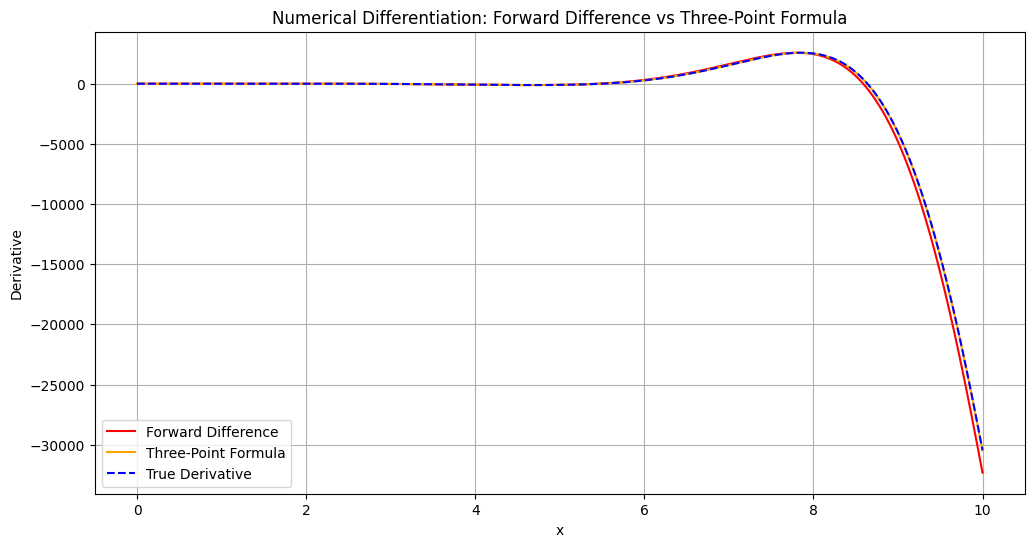

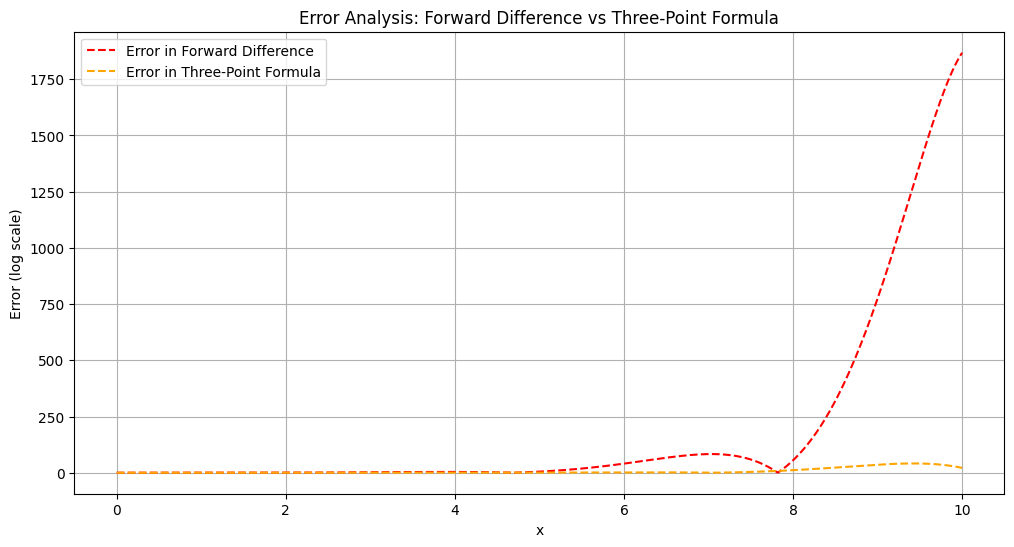

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Forward difference formula
def forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

# Three-point formula
def three_point(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

# Function and its derivative
f = lambda x: np.exp(x) * np.sin(x)
fprime = lambda x: np.exp(x) * np.sin(x) + np.exp(x) * np.cos(x)

# Test forward difference
print(forward_difference(f, 2, 1))  # Should print approximate derivative at x=2

# Numerical differentiation at a point
x = 2
h = 1e-6
forward = forward_difference(f, x, h)
three_point_value = three_point(f, x, h)

print("Forward Difference:", forward)
print("Three-Point Formula:", three_point_value)
print("True Derivative:", fprime(x))

# Plotting the curves for the two methods
h = 0.1
x_vals = np.linspace(0, 10, 1000)
true_vals_deriv = [fprime(x) for x in x_vals]
y_vals_forward = [forward_difference(f, x, h) for x in x_vals]
y_vals_three_point = [three_point(f, x, h) for x in x_vals]
err_vals_forward = [np.abs(y_vals_forward[i] - true_vals_deriv[i]) for i in range(len(y_vals_forward))]
err_vals_three = [np.abs(y_vals_three_point[i] - true_vals_deriv[i]) for i in range(len(y_vals_three_point))]

# Plot numerical differentiation results
plt.figure(figsize=(12, 6))
#plt.yscale('log')
plt.plot(x_vals, y_vals_forward, label='Forward Difference', color='red')
plt.plot(x_vals, y_vals_three_point, label='Three-Point Formula', color='orange')
plt.plot(x_vals, true_vals_deriv, label='True Derivative', color='blue', linestyle='--')
plt.title("Numerical Differentiation: Forward Difference vs Three-Point Formula")
plt.xlabel("x")
plt.ylabel("Derivative")
plt.legend()
plt.grid()
plt.show()

# Plot errors
plt.figure(figsize=(12, 6))
#plt.yscale('log')
plt.plot(x_vals, err_vals_forward, label="Error in Forward Difference", color='red', linestyle='--')
plt.plot(x_vals, err_vals_three, label="Error in Three-Point Formula", color='orange', linestyle='--')
plt.title("Error Analysis: Forward Difference vs Three-Point Formula")
plt.xlabel("x")
plt.ylabel("Error (log scale)")
plt.legend()
plt.grid()
plt.show()


## Numerical Integration: Trapezoidal Rule

0.33335


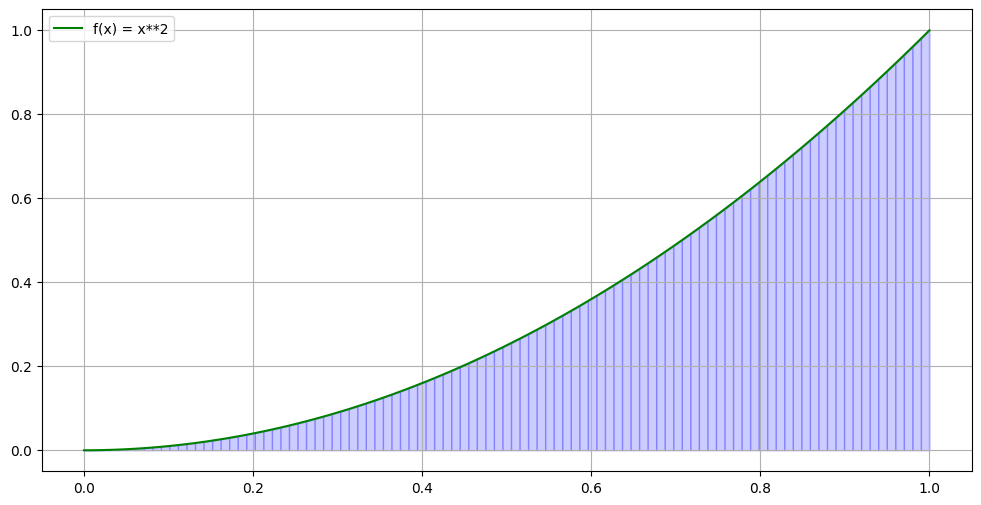

In [19]:
def trapezoidal_integral(f, a, b, n):

    dx = (b - a) / n  # Step size

    # formula of area of trapezoid = 0.5 * (sum of parallel sides) * height

    area = 0.0
    for i in range(1, n+1):
        s1 = f(a + dx * (i - 1))
        s2 = f(a + dx * i)

        area += 0.5 * (s1 + s2) * dx

    
    return area


f = lambda x : x**2

print(trapezoidal_integral(f, 0, 1, 100))


x_vals = np.linspace(0, 1, 100)
y_vals = [f(x) for x in x_vals]

plt.figure(figsize=(12,6))
plt.plot(x_vals, y_vals, label='f(x) = x**2', color='green')
for i in range(100):
    plt.fill_between(x_vals[i:i+2], y_vals[i:i+2], alpha=0.2, color='blue')


plt.grid()
plt.legend()
